# FLUXNET VISUALIZATION

## LOAD

In [8]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#handle = open('/Users/lewlee/Desktop/Research/results/FLX_DD_7D_Models.pickle','rb')
handle = open('/Users/lewlee/Desktop/Research/results/FLX_DD_1D_Models.pickle','rb')
result = pickle.load(handle)

print('site name is {}'.format(result.keys()))
print('\nmodel name is {}'.format(result['CN-Cha'].keys()))
print('\nmetric name is {}'.format(result['CN-Cha']['Ridge'].keys()))

site name is dict_keys(['CN-Cha', 'US-Me2', 'FI-Sod', 'CA-SF2', 'BR-Sa3', 'DE-Obe', 'AU-Ade', 'US-Tw3', 'FI-Hyy', 'DK-Sor', 'AU-Lox', 'US-AR1', 'FI-Jok', 'CN-Cng', 'DE-Geb', 'IT-Isp', 'NL-Hor', 'AU-Fog', 'NO-Blv', 'AU-Cpr', 'DK-ZaH', 'US-KS2', 'US-Ton', 'CN-Din', 'SD-Dem', 'AU-Whr', 'CN-Sw2', 'US-Wkg', 'US-SRM', 'CN-HaM', 'FR-LBr', 'RU-Ha1', 'AU-RDF', 'AU-Tum', 'US-ARc', 'US-UMd', 'US-Tw2', 'AU-Stp', 'IT-SR2', 'AU-DaP', 'IT-Cp2', 'FR-Gri', 'AU-DaS', 'US-ARM', 'IT-Ro1', 'CA-Qfo', 'US-Me6', 'BE-Vie', 'AT-Neu', 'IT-SRo', 'ES-LgS', 'IT-BCi', 'CA-NS2', 'CA-NS5', 'CH-Lae', 'GF-Guy', 'CH-Cha', 'CN-Dan', 'NL-Loo', 'CA-NS6', 'AU-Wom', 'CN-Qia', 'DE-Hai', 'DE-Kli', 'RU-Fyo', 'SN-Dhr', 'CH-Fru', 'IT-Ro2', 'AU-Wac', 'IT-Col', 'FI-Lom', 'US-Var', 'IT-Cpz', 'US-SRG', 'AU-Ync', 'IT-Lav', 'AU-Gin', 'AU-TTE', 'IT-CA1', 'CH-Dav', 'CH-Oe1', 'AU-Rig', 'DE-Lkb', 'US-WCr', 'CA-SF3', 'BE-Lon', 'US-ARb', 'CN-Du2', 'US-Syv', 'CH-Oe2', 'IT-MBo', 'JP-SMF', 'AR-SLu', 'DE-Tha', 'US-NR1', 'CA-NS7', 'AU-ASM', 'CN-Ha

## Output r2, importance, site name

In [14]:
# init r_valid, importance, site_name_
r_valid = np.zeros((len(result.keys()), len(result['CN-Cha'].keys())))
print(r_valid.shape)
importance = []
site_name_ = []

# output
for i, site_name in enumerate(result.keys()):
    #print('*******************************')
    #print('The {} site name is {}'.format(i, site_name))
    _r = np.zeros((len(result[site_name].keys()),1))
    for j, model_name in enumerate(result[site_name].keys()):
        _r[j] = result[site_name][model_name]['valid_metrics']
        if len(result[site_name][model_name]['importance']) != 0:
            importance.append(result[site_name][model_name]['importance'])
    r_valid[i,:] = np.squeeze(_r)
    site_name_.append(site_name)

(120, 7)


## Good sites and Bad sites

In [16]:
good_site = []
bad_site = []

for i in range(r_valid.shape[0]):
    if r_valid[i,4]<0.4:
        bad_site.append(site_name_[i])
    if r_valid[i,4]>0.98:
        good_site.append(site_name_[i])

print(good_site)
print(bad_site)

a = np.zeros((37,len(bad_site)))
b = np.zeros((37,len(good_site)))

for i in range(len(bad_site)):
    a[:,i] = np.array(result[bad_site[i]]['LGB']['importance'])
for i in range(len(good_site)):
    b[:,i] = np.array(result[good_site[i]]['LGB']['importance'])

['US-Me2', 'AU-Ade', 'AU-Fog', 'US-Ton', 'FR-LBr', 'FR-Gri', 'IT-SRo', 'CA-NS6', 'US-Var', 'IT-Cpz', 'CA-NS7', 'CN-Ha2', 'US-Blo', 'US-GLE']
['AU-Lox', 'NO-Blv', 'FI-Lom']


## Plot importance array

Text(0, 0.5, 'R2')

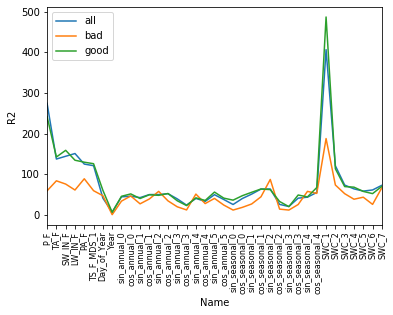

In [17]:
name = ['P_F','TA_F','SW_IN_F' ,'LW_IN_F', 'PA_F',
 'TS_F_MDS_1' ,'Day_of_Year', 'Year', 'sin_annual_0', 'cos_annual_0',
 'sin_annual_1', 'cos_annual_1', 'sin_annual_2' ,'cos_annual_2',
 'sin_annual_3', 'cos_annual_3' ,'sin_annual_4' ,'cos_annual_4',
 'sin_annual_5' ,'cos_annual_5' ,'sin_seasonal_0', 'cos_seasonal_0',
 'sin_seasonal_1', 'cos_seasonal_1' ,'sin_seasonal_2' ,'cos_seasonal_2',
 'sin_seasonal_3' ,'cos_seasonal_3', 'sin_seasonal_4' ,'cos_seasonal_4',
 'SWC_1' ,'SWC_2' ,'SWC_3', 'SWC_4', 'SWC_5', 'SWC_6' ,'SWC_7']

plt.figure()
plt.plot(np.mean(np.array(importance),axis=0))
plt.plot(np.mean(a,axis=1))
plt.plot(np.mean(b,axis=1))
plt.xlim(0,len(name)-1)
plt.xticks(range(len(name)), name, fontsize=8, rotation=90)
plt.legend(['all','bad','good'])

plt.xlabel('Name')
plt.ylabel('R2')

## Average R2

In [18]:
site_names = []
for i in range(r_valid.shape[0]):
    if r_valid[i,4]>0.4:
        site_names.append(site_name_[i])
r_valid = r_valid[r_valid[:,4]>0.4,:]
r_valid[r_valid<0] = 0

print('The avg R2 is {}'.format(np.mean(r_valid, axis=0)))

The avg R2 is [0.7051957  0.43592273 0.88806158 0.83670872 0.89867762 0.557888
 0.06189399]


## Get LAT LON of sites

In [20]:

# read lat,lon,site_name
df = pd.read_csv("/Users/lewlee/Desktop/Research/test_data/FLX2015/FLX2015_info.csv")
site_name_all = df['Site Name']

# init
lat = []
lon = []

# color series according r_valid
cmap = plt.cm.YlOrRd
vmin = np.min(r_valid)
vmax = np.max(r_valid)
colors = []

for i in range(len(site_names)):
    _target_site = site_names[i]
    _ind = df[site_name_all == _target_site].index.tolist()
    if _ind:
        lat.append(df['LAT'][_ind[0]])
        lon.append(df['LON'][_ind[0]])
        # print(cmap(np.sqrt((r_valid[i]-vmin)/(vmax-vmin)))[:3])
        colors.append(cmap(np.sqrt((r_valid[i]-vmin)/(vmax-vmin)))[:3])

    else:
        lat.append(np.nan)
        lon.append(np.nan)
        colors.append(np.nan)

## 空间分布图

/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


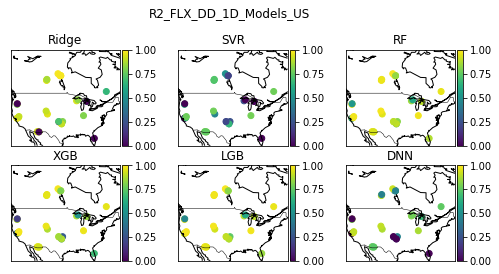

In [21]:
model_name = ['Ridge', 'SVR', 'RF', 'XGB', 'LGB', 'DNN', 'LSTM']
# plot and save

#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8.5,5))
fig = plt.figure(figsize=(8.5,6))
for i in range(r_valid.shape[1]-1):
    ax = plt.subplot(3,3,i+1)
    map = Basemap(llcrnrlon=-125, llcrnrlat=25, urcrnrlon=-67, urcrnrlat=65, projection='mill')

    map.drawcoastlines()
    map.drawcountries()

    x, y = map(lon, lat)
    sc = map.scatter(x, y, c=np.transpose(r_valid[:,i]),vmin=0, vmax=1)
    map.colorbar(sc)

    ax.set_title(model_name[i])
fig.suptitle('R2_FLX_DD_1D_Models_US')
plt.savefig("Contour_R2_FLX_DD_1D_Models_US.eps")

/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


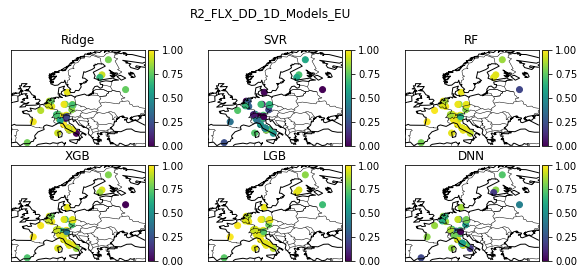

In [22]:
model_name = ['Ridge', 'SVR', 'RF', 'XGB', 'LGB', 'DNN', 'LSTM']
# plot and save

#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8.5,5))
fig = plt.figure(figsize=(10,6))
for i in range(r_valid.shape[1]-1):
    ax = plt.subplot(3,3,i+1)
    map = Basemap(llcrnrlon=-9, llcrnrlat=36, urcrnrlon=40, urcrnrlat=71)

    map.drawcoastlines()
    map.drawcountries()

    x, y = map(lon, lat)
    sc = map.scatter(x, y, c=np.transpose(r_valid[:,i]),vmin=0, vmax=1)
    map.colorbar(sc)

    ax.set_title(model_name[i])
fig.suptitle('R2_FLX_DD_1D_Models_EU')
plt.savefig("Contour_R2_FLX_DD_1D_Models_US.eps")

## R2的散点图

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


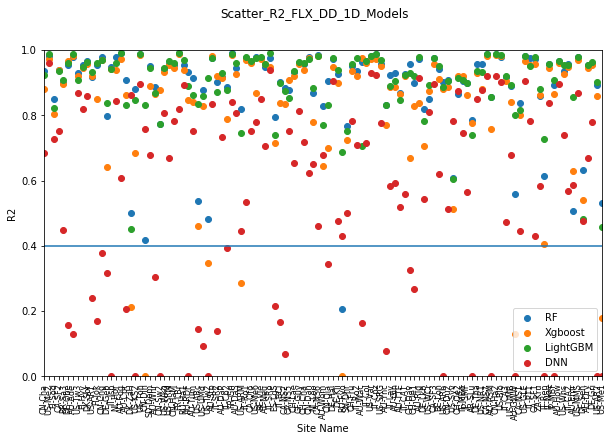

In [23]:
fig = plt.figure(figsize=(10,6))
plt.scatter(range(len(site_names)),r_valid[:,2])
plt.scatter(range(len(site_names)),r_valid[:,3])
plt.scatter(range(len(site_names)),r_valid[:,4])
plt.scatter(range(len(site_names)),r_valid[:,5])
plt.xlim(0,len(site_names)-1)
plt.ylim(0,1)
plt.xticks(range(len(site_names)), site_names, fontsize=8, rotation=90)
plt.xlabel('Site Name')
plt.ylabel('R2')
plt.legend(['RF','Xgboost','LightGBM','DNN'])
a = 0.4*np.ones((len(site_names),1))
plt.plot(a)
#plt.yticks('R2')
fig.suptitle('Scatter_R2_FLX_DD_1D_Models')
plt.savefig("Scatter_R2_FLX_DD_1D_Models.eps")

## R2的箱线图

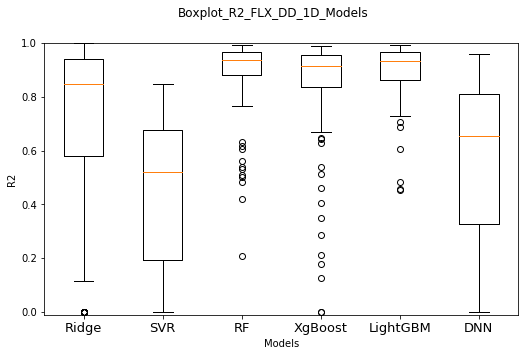

In [24]:
fig = plt.figure(figsize=(8.5,5))

models = ['Ridge','SVR','RF','XgBoost','LightGBM','DNN']
plt.boxplot(r_valid[:,:])
plt.xlabel('Models')
plt.ylabel('R2')
plt.xlim(0.5,6.5)
plt.ylim(-0.01,1)
plt.xticks(range(1,7), models, fontsize=13, rotation=0)

fig.suptitle('Boxplot_R2_FLX_DD_1D_Models')
plt.savefig("Boxplot_R2_FLX_DD_1D_Models.eps")

## 站点SM散点图（看干旱还是湿润表现更差）

In [25]:
good_site = []
bad_site = []

for i in range(r_valid.shape[0]):
    if r_valid[i,4]<0.7:
        bad_site.append(site_name_[i])
    if r_valid[i,4]>0.98:
        good_site.append(site_name_[i])
        
g_y_valid = []
g_pred_valid = []
for i in range(len(good_site)):
    g_y_valid = np.concatenate((np.array(result[good_site[i]]['LGB']['y_valid']),g_y_valid),axis=0)
    g_pred_valid = np.concatenate((np.array(result[good_site[i]]['LGB']['pred_valid']),g_pred_valid),axis=0)

b_y_valid = []
b_pred_valid = []
for i in range(len(bad_site)):
    b_y_valid = np.concatenate((np.array(result[bad_site[i]]['LGB']['y_valid']),b_y_valid),axis=0)
    b_pred_valid = np.concatenate((np.array(result[bad_site[i]]['LGB']['pred_valid']),b_pred_valid),axis=0)
print(bad_site)
print(good_site)

['NO-Blv', 'DE-Hai', 'BE-Lon', 'IT-CA2', 'AU-Dry']
['US-Me2', 'AU-Ade', 'NL-Hor', 'DK-ZaH', 'US-SRM', 'AU-DaP', 'BE-Vie', 'CN-Dan', 'AU-Wac', 'IT-Col', 'AR-SLu', 'US-NR1', 'CA-NS7', 'US-UMB']


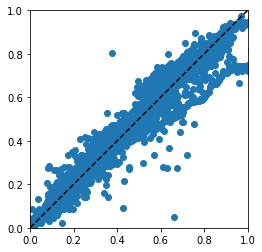

In [26]:
plt.figure()

x = np.arange(0,10,0.01)
y = x

ax = plt.gca()
ax.set_aspect(1)
#plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(x,y,c='k',linestyle='dashed')
plt.scatter(g_y_valid, g_pred_valid)

# 

# 

# 

# 

# ESA-CCI VISUALIZATION

In [289]:
import pickle

handle = open('/Users/lewlee/Desktop/Research/results/compare_models_esa.pickle','rb')
result = pickle.load(handle)

print('lat name is {}'.format(result.keys()))
print('\nlon name is {}'.format(result[5].keys()))
print('\nmodel name is {}'.format(result[0][4].keys()))
print('\nmetric name is {}'.format(result[0][4]['DNN'].keys()))

lat name is dict_keys([0, 1, 2, 3, 4, 5])

lon name is dict_keys([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11])

model name is dict_keys(['Ridge', 'SVR', 'RF', 'XGB', 'LGB', 'stacking', 'DNN', 'LSTM'])

metric name is dict_keys(['train_metrics', 'valid_metrics', 'pred_train', 'pred_valid', 'x_train', 'x_valid', 'y_train', 'y_valid'])


In [283]:
#obj = nc.Dataset('Desktop/Research/test_data/ESA-CCI/ESACCI-SOILMOISTURE-L3S-SSMS-ACTIVE-20020618000000-fv04.5.nc')
#obj['LAT']

In [290]:
import numpy as np

r_valid = np.zeros((len(result.keys()), 12,8))

#print(r_valid.shape)

for i,lat in enumerate(result.keys()):
    #print(i)
    #print('*******************************')
    #print('The {} site name is {}'.format(i, site_name))
    for j, lon in enumerate(result[lat].keys()):
        #print(j)
        for k, models in enumerate(result[lat][lon].keys()):
            #print(k)
            r_valid[lat,lon,k] = result[lat][lon][models]['valid_metrics']  

r_valid[r_valid==0]=np.nan 
r_valid[r_valid<0] = 0

/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


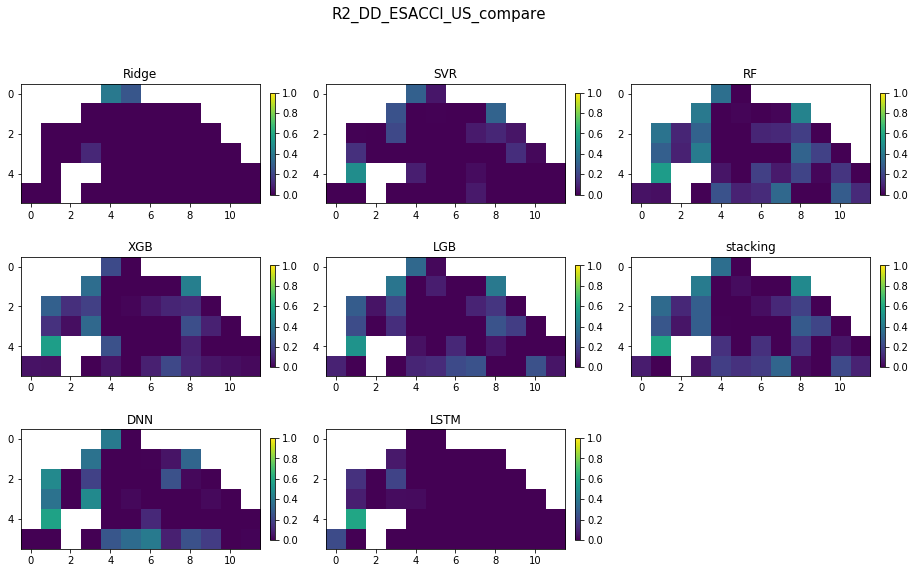

In [291]:
model_name = ['Ridge', 'SVR', 'RF', 'XGB', 'LGB', 'stacking', 'DNN', 'LSTM']
# plot and save

fig = plt.figure(figsize=(15.5,9))
for i in range(8):
    ax = plt.subplot(3,3,i+1)
    im = ax.imshow(r_valid[:,:,i],vmin=0, vmax=1)
    ax.set_title(model_name[i])
    plt.colorbar(im,fraction=0.02, pad=0.04)
    
fig.suptitle('R2_DD_ESACCI_US_compare',fontsize=15)
plt.savefig("R2_DD_ESACCI_US_compare.eps")

# 

# 

# 

# 

# SMAP

## load

In [39]:
import pickle
import numpy as np


handle = open('/Users/lewlee/Desktop/Research/results/SMAP_3HH_1D_Models.pickle','rb')
result = pickle.load(handle)

print('lat name is {}'.format(result.keys()))
print('\nlon name is {}'.format(result[0].keys()))
print('\nmodel name is {}'.format(result[0][0].keys()))
print('\nmetric name is {}'.format(result[0][4]['DNN'].keys()))

len(result[0].keys())

lat name is dict_keys(['train_metrics', 'valid_metrics', 'pred_train', 'pred_valid', 'x_train', 'x_valid', 'y_train', 'y_valid', 'importance'])


KeyError: 0

In [31]:
r_valid = np.zeros((len(result.keys()), len(result[0].keys())+1,8))

#print(r_valid.shape)

for i,lat in enumerate(result.keys()):
    #print(i)
    #print('*******************************')
    #print('The {} site name is {}'.format(i, site_name))
    for j, lon in enumerate(result[lat].keys()):
        #print(j)
        for k, models in enumerate(result[lat][lon].keys()):
            #print(k)
            r_valid[lat,lon,k] = result[lat][lon][models]['valid_metrics']  

r_valid[r_valid==0]=np.nan 
r_valid[r_valid<0] = 0

/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


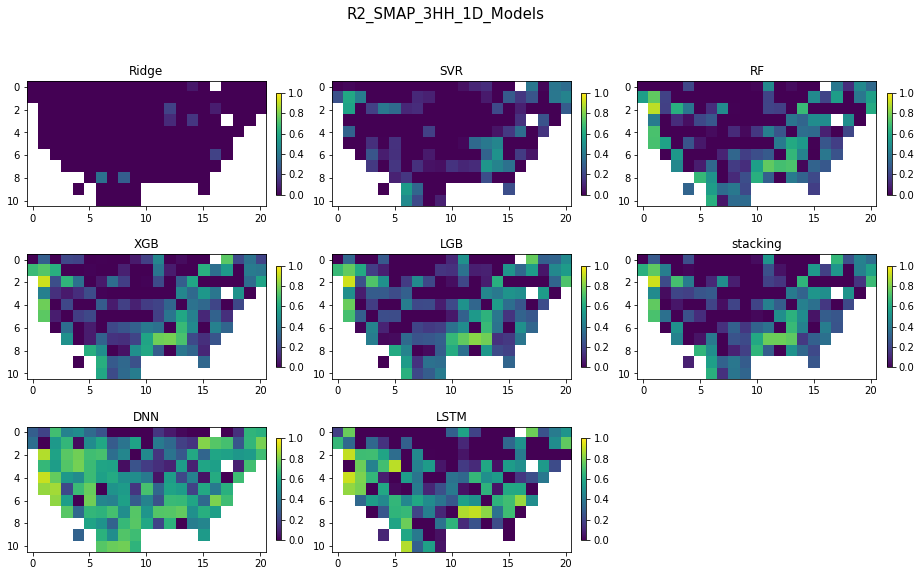

In [33]:
model_name = ['Ridge', 'SVR', 'RF', 'XGB', 'LGB', 'stacking', 'DNN', 'LSTM']
# plot and save

fig = plt.figure(figsize=(15.5,9))
for i in range(8):
    ax = plt.subplot(3,3,i+1)
    im = ax.imshow(r_valid[:,:,i],vmin=0, vmax=1)
    ax.set_title(model_name[i])
    plt.colorbar(im,fraction=0.02, pad=0.04)
    
fig.suptitle('R2_SMAP_3HH_1D_Models',fontsize=15)
plt.savefig("Coutour_R2_SMAP_3HH_1D_Models.eps")

In [37]:
"""
models = ['Ridge','SVR','RF','XgBoost','LightGBM','stacking', 'DNN', 'LSTM']
import matplotlib.pyplot as plt

r_valid1 = r_valid.reshape((-1,8))
#r_valid1 = pd.DataFrame(r_valid1)
#r_valid1 = r_valid1.dropna()

#print(r_valid1)
fig = plt.figure(figsize=(8.5,5))
plt.boxplot(r_valid1)
plt.xlabel('Models')
plt.ylabel('R2')
plt.xlim(0.5,8.5)
plt.ylim(-0.01,1)
plt.xticks(range(1,9), models, fontsize=13, rotation=0)

#fig.suptitle('boxplot_R2_DD_SMAP_compare')
#plt.savefig("boxplot_R2_DD_SMAP_compare.eps")

#plt.figure()
#plt.plot(r_valid1[:,6])
"""

'\nmodels = [\'Ridge\',\'SVR\',\'RF\',\'XgBoost\',\'LightGBM\',\'stacking\', \'DNN\', \'LSTM\']\nimport matplotlib.pyplot as plt\n\nr_valid1 = r_valid.reshape((-1,8))\n#r_valid1 = pd.DataFrame(r_valid1)\n#r_valid1 = r_valid1.dropna()\n\n#print(r_valid1)\nfig = plt.figure(figsize=(8.5,5))\nplt.boxplot(r_valid1)\nplt.xlabel(\'Models\')\nplt.ylabel(\'R2\')\nplt.xlim(0.5,8.5)\nplt.ylim(-0.01,1)\nplt.xticks(range(1,9), models, fontsize=13, rotation=0)\n\n#fig.suptitle(\'boxplot_R2_DD_SMAP_compare\')\n#plt.savefig("boxplot_R2_DD_SMAP_compare.eps")\n\n#plt.figure()\n#plt.plot(r_valid1[:,6])\n'

# ConvLSTM SMAP

In [253]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# file path
#output = '/Users/lewlee/Desktop/Research/results/SMAP_3HH_7D_ConvLSTM.pickle'
#output = '/Users/lewlee/Desktop/Research/results/SMAP_3H_1D_ConvLSTM.pickle'
#output = '/Users/lewlee/Desktop/Research/results/SMAP_3HH_1D_AttConvLSTM.pickle'
#output = '/Users/lewlee/Desktop/Research/results/SMAP_3HH_7D_AttConvLSTM_10.pickle'
output = '/Users/lewlee/Documents/GitHub/SMNet/result/SMAP_P_3HH_8_1D_32_N_DCSCS.pickle'



# read pickle file
handle = open(output, 'rb')
result = pickle.load(handle)

result.keys()

pred_train = result['pred_train']
pred_valid = result['pred_valid']
y_train = result['y_train']
y_valid = result['y_valid']


In [256]:
pred_train = np.reshape(pred_train, [-1,8,8,8,1])
pred_valid = np.reshape(pred_valid, [-1,8,8,8,1])
y_train = np.reshape(y_train, [-1,8,8,8,1])
y_valid = np.reshape(y_valid, [-1,8,8,8,1])

In [257]:
pred_train.shape

(8908, 8, 8, 8, 1)

In [258]:
y_train.shape

(8908, 8, 8, 8, 1)

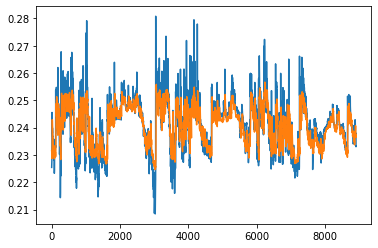

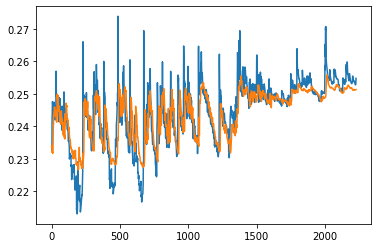

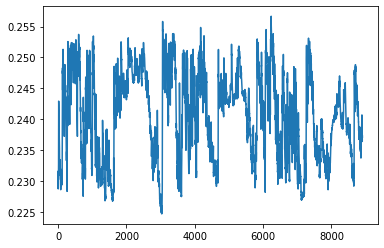

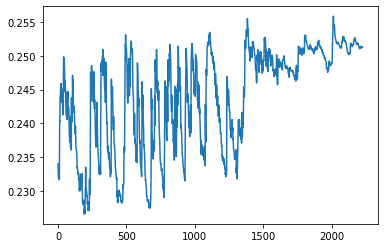

In [214]:
plt.figure()
plt.plot(y_train[:,0,1,1,:])
plt.plot(pred_train[:,0,1,1,:])
plt.figure()
plt.plot(y_valid[:,0,1,1,:])
plt.plot(pred_valid[:,0,1,1,:])
plt.figure()
plt.plot(pred_train[:,0,1,1,:])
plt.figure()
plt.plot(pred_valid[:,0,1,1,:])

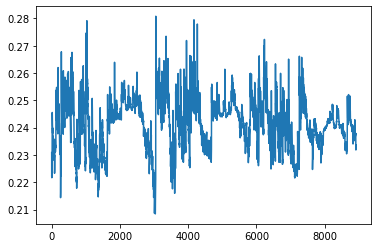

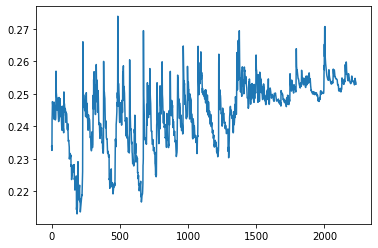

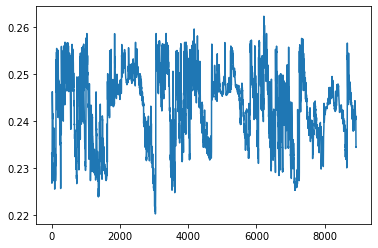

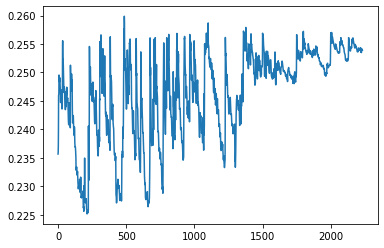

In [228]:
plt.figure()
plt.plot(y_train[:,1,1,:])
plt.figure()
plt.plot(y_valid[:,1,1,:])
plt.figure()
plt.plot(pred_train[:,1,1,:])
plt.figure()
plt.plot(pred_valid[:,1,1,:])

In [259]:
from sklearn.metrics import r2_score


In [260]:
rr = np.zeros((8,8))
rr1 = np.zeros((8,8))


for i in range(8):
    for j in range(8):
        a = np.squeeze(pred_valid[:,i,j,:])
        b = np.squeeze(y_valid[:,i,j,:])
        c = np.squeeze(pred_train[:,i,j,:])
        d = np.squeeze(y_train[:,i,j,:])
        rr[i,j] = r2_score(b,a)
        rr1[i,j] = r2_score(d,c)

In [262]:
rr = np.zeros((8,8))
rr1 = np.zeros((8,8))


for i in range(8):
    for j in range(8):
        a = np.squeeze(pred_valid[:,0,i,j,:])
        b = np.squeeze(y_valid[:,0,i,j,:])
        c = np.squeeze(pred_train[:,0,i,j,:])
        d = np.squeeze(y_train[:,0,i,j,:])
        rr[i,j] = r2_score(b,a)
        rr1[i,j] = r2_score(d,c)

In [66]:
aa = rr

In [189]:
aa

array([[0.54335585, 0.5370519 , 0.58799803, 0.59970236, 0.57448444,
        0.59943983, 0.62077755, 0.63567855],
       [0.57833782, 0.57508929, 0.6091727 , 0.61157011, 0.6210043 ,
        0.63655527, 0.64268647, 0.65574392],
       [0.56405917, 0.56850175, 0.61851994, 0.62153836, 0.63302529,
        0.64748932, 0.65737823, 0.66427398],
       [0.54420693, 0.58234497, 0.59907169, 0.62390588, 0.63250249,
        0.64960475, 0.66202624, 0.65503577],
       [0.49637342, 0.54640393, 0.61990374, 0.62426642, 0.63004018,
        0.60302542, 0.57232552, 0.60676958],
       [0.49167177, 0.57593444, 0.60611237, 0.63184556, 0.64724538,
        0.62326874, 0.60858991, 0.64519598],
       [0.47393728, 0.58294205, 0.63772511, 0.65142911, 0.66299978,
        0.66665737, 0.68351888, 0.6766068 ],
       [0.54302629, 0.62209223, 0.60250347, 0.62285998, 0.55493014,
        0.65140776, 0.64301125, 0.68471614]])

In [250]:
rr12 = rr
rr12

array([[0.82021746, 0.83292783, 0.83582553, 0.82801953, 0.83893915,
        0.83372596, 0.8264217 , 0.83282167],
       [0.80014883, 0.82710897, 0.8191058 , 0.79581839, 0.8432625 ,
        0.79187249, 0.82055528, 0.83028747],
       [0.73927977, 0.78033338, 0.78230892, 0.77922604, 0.78052665,
        0.80242116, 0.81184765, 0.81996421],
       [0.65783597, 0.63617933, 0.66351942, 0.72384268, 0.71832318,
        0.77306184, 0.75744459, 0.72986389],
       [0.51532601, 0.49923569, 0.64356995, 0.70035476, 0.69675069,
        0.66545035, 0.57897704, 0.61680608],
       [0.50101721, 0.52682878, 0.6120796 , 0.66837186, 0.66921754,
        0.61769643, 0.5725953 , 0.63971107],
       [0.60420334, 0.64120601, 0.65130952, 0.71695443, 0.73449777,
        0.72895873, 0.749142  , 0.78622313],
       [0.75524682, 0.80566219, 0.78778323, 0.79421964, 0.82050074,
        0.8601436 , 0.85736285, 0.85638773]])

In [263]:
rr

array([[-14.31380859,   0.50215958,   0.54631248,   0.59486908,
          0.51905688,   0.61368971,   0.63682409,   0.60160668],
       [  0.5480127 ,   0.60660799,   0.60179066,   0.61436733,
          0.62832734,   0.63233321,   0.64161882,   0.64812304],
       [  0.50407189,   0.59271807,   0.62436621,   0.62215715,
          0.6412535 ,   0.63289258,   0.65565107,   0.64665152],
       [  0.40295804,   0.62825449,   0.61542448,   0.63095206,
          0.616864  ,   0.60716385,   0.66783898,   0.64494635],
       [  0.3350507 ,   0.58480965,   0.62333275,   0.62258594,
          0.56558209,   0.545071  ,   0.58055484,   0.64292893],
       [  0.3267808 ,   0.54608777,   0.6341155 ,   0.59312334,
          0.57957806,   0.59231035,   0.60656485,   0.62510169],
       [  0.3426588 ,   0.60952171,   0.63948333,   0.63555103,
          0.54888365,   0.60361105,   0.6138139 ,   0.60880674],
       [  0.41890625,   0.5790141 ,   0.63403484,   0.66254907,
          0.58549608,   0.6283292

In [224]:
rr-aa

array([[-0.54335585, -0.03489232, -0.04168555, -0.00483328, -0.05542756,
         0.01424988,  0.01604654, -0.03407187],
       [-0.03032512,  0.0315187 , -0.00738204,  0.00279723,  0.00732304,
        -0.00422206, -0.00106765, -0.00762089],
       [-0.05998728,  0.02421631,  0.00584627,  0.00061879,  0.0082282 ,
        -0.01459673, -0.00172717, -0.01762246],
       [-0.14124889,  0.04590952,  0.01635279,  0.00704618, -0.01563849,
        -0.04244089,  0.00581274, -0.01008943],
       [-0.16132271,  0.03840572,  0.00342901, -0.00168048, -0.06445809,
        -0.05795442,  0.00822931,  0.03615935],
       [-0.16489097, -0.02984668,  0.02800313, -0.03872223, -0.06766732,
        -0.03095839, -0.00202505, -0.02009429],
       [-0.13127848,  0.02657966,  0.00175822, -0.01587807, -0.11411612,
        -0.06304632, -0.06970497, -0.06780006],
       [-0.12412004, -0.04307813,  0.03153136,  0.0396891 ,  0.03056594,
        -0.02307852, -0.00721531, -0.04082619]])

In [176]:
sum(sum(rr-aa <0))

42

In [221]:
rr[rr<0] = 0

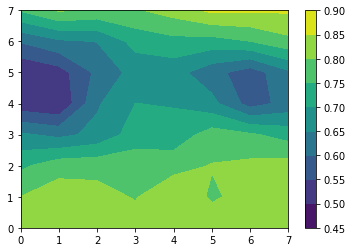

In [252]:
plt.figure()
a = plt.contourf(rr)
plt.colorbar()


#plt.figure()
#plt.contourf(rr1)
#plt.colorbar()

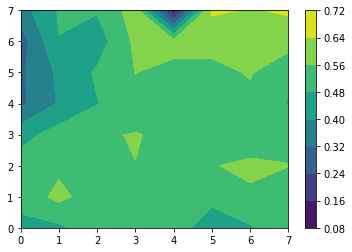

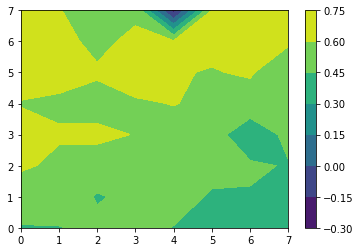

In [44]:
plt.figure()
plt.contourf(rr)
plt.colorbar()

plt.figure()
plt.contourf(rr1)
plt.colorbar()

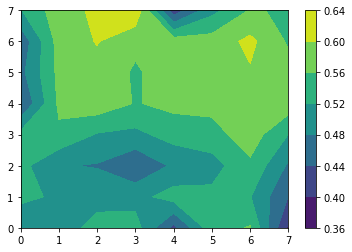

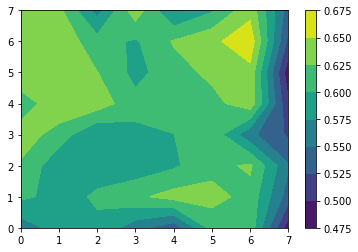

In [19]:
plt.figure()
plt.contourf(rr)
plt.colorbar()

plt.figure()
plt.contourf(rr1)
plt.colorbar()

In [122]:
print(rr)

[[ 0.41931411  0.49498159  0.52489624  0.51671655  0.23619888  0.53099416
   0.5155754   0.48044551]
 [ 0.46989538  0.54139005  0.52506099  0.4947663   0.51887392  0.53125586
   0.52968439  0.49797489]
 [ 0.50599793  0.53712587  0.49524572  0.50385964  0.5135903   0.4944058
   0.51402961  0.53250574]
 [ 0.57097854  0.57849091  0.52525958  0.55408234  0.56344319  0.55797252
   0.57224916  0.57212227]
 [ 0.57207379  0.59094535  0.5907802   0.58140441  0.57770041  0.5652835
   0.57613859  0.58470284]
 [ 0.56854367  0.59644983  0.59705096  0.55749667  0.58035618  0.57231483
   0.58384623  0.59149101]
 [ 0.57265902  0.58386356  0.61945521  0.57161678  0.56809961  0.5520608
   0.5723674   0.58947795]
 [ 0.56462056  0.57372338  0.61164973  0.62350061 -0.37933952  0.60116675
   0.60904827  0.59147345]]


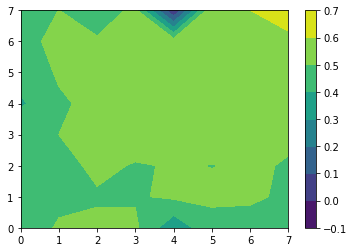

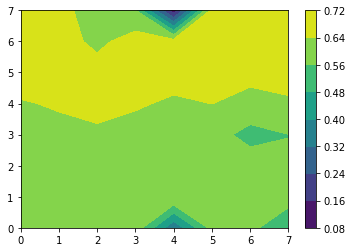

In [114]:
plt.figure()
plt.contourf(rr)
plt.colorbar()

plt.figure()
plt.contourf(rr1)
plt.colorbar()

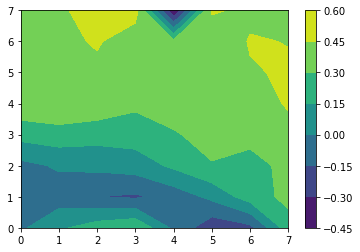

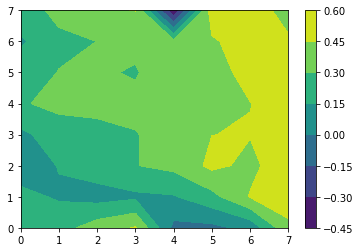

In [106]:
plt.figure()
plt.contourf(rr)
plt.colorbar()

plt.figure()
plt.contourf(rr1)
plt.colorbar()

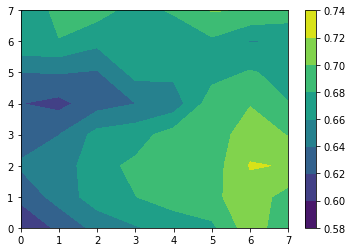

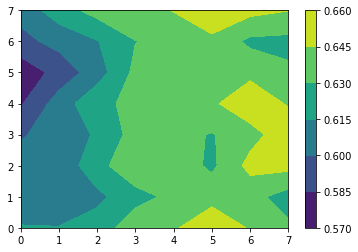

In [84]:
plt.figure()
plt.contourf(rr)
plt.colorbar()

plt.figure()
plt.contourf(rr1)
plt.colorbar()

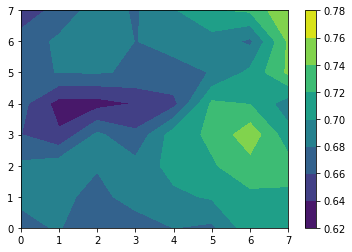

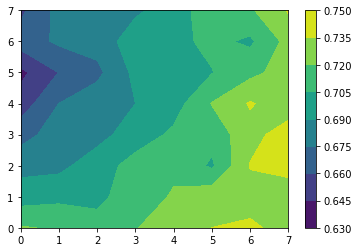

In [75]:
plt.figure()
plt.contourf(rr)
plt.colorbar()

plt.figure()
plt.contourf(rr1)
plt.colorbar()

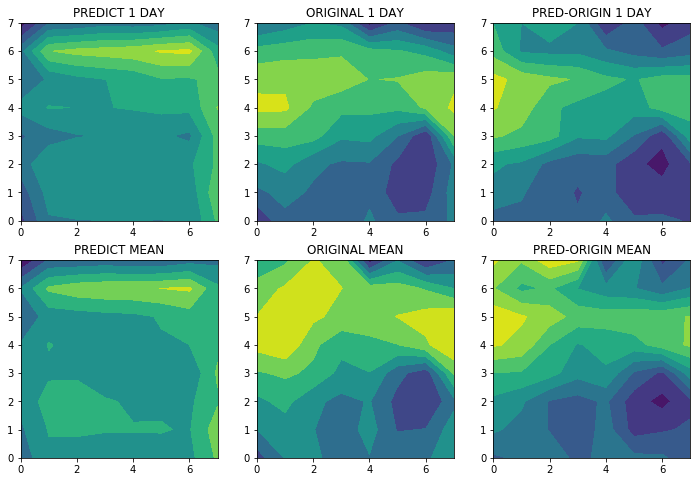

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

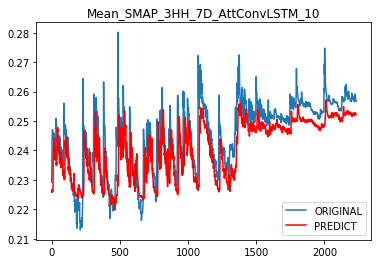

In [92]:
pred_valid1 = np.mean(pred_valid,axis=0)
y_valid1 = np.mean(y_valid,axis=0)

i = 1000
fig1 = plt.figure(figsize=(12,8))
plt.subplot(2,3,4)
plt.contourf(np.squeeze(pred_valid1))
plt.title('PREDICT MEAN')
plt.subplot(2,3,5)
plt.contourf(np.squeeze(y_valid1))
plt.title('ORIGINAL MEAN')
plt.subplot(2,3,6)
plt.contourf(np.squeeze(y_valid1-pred_valid1))
plt.title('PRED-ORIGIN MEAN')

plt.subplot(2,3,1)
plt.contourf(np.squeeze(pred_valid[i,:,:,:]))
plt.title('PREDICT 1 DAY')
plt.subplot(2,3,2)
plt.contourf(np.squeeze(y_valid[i,:,:,:]))
plt.title('ORIGINAL 1 DAY')
plt.subplot(2,3,3)
plt.contourf(np.squeeze(y_valid[i,:,:,:]-pred_valid[i,:,:,:]))
plt.title('PRED-ORIGIN 1 DAY')
plt.show()

fig1.suptitle('Mean_SMAP_3HH_1D_AttConvLSTM_10')
plt.savefig("Coutour_Mean_SMAP_3HH_1D_AttConvLSTM_10.eps")

pred_valid2 = np.mean(pred_valid,axis=(1,2))
y_valid2 = np.mean(y_valid,axis=(1,2))

fig2 = plt.figure()
plt.plot(np.squeeze(y_valid2))
plt.plot(np.squeeze(pred_valid2), c='red')
plt.legend(['ORIGINAL','PREDICT'])
#plt.axis('off')
plt.title('Mean_SMAP_3HH_7D_AttConvLSTM_10')
plt.savefig("Plot_Mean_SMAP_3HH_7D_AttConvLSTM_10.eps")

/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/lewlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


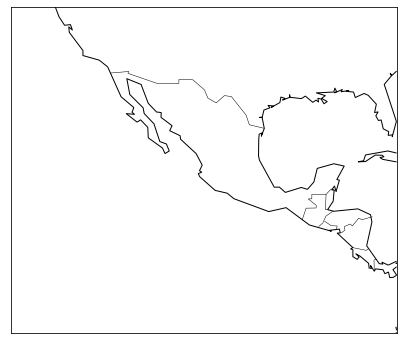

In [45]:
from mpl_toolkits.basemap import Basemap

#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8.5,5))
fig = plt.figure(figsize=(8.5,6))

map = Basemap(llcrnrlon=-130, llcrnrlat=0, urcrnrlon=-80, urcrnrlat=40, projection='mill')

map.drawcoastlines()
map.drawcountries()

#    x, y = map(lon, lat)
#    sc = map.scatter(x, y, c=np.transpose(r_valid[:,i]),vmin=0, vmax=1)
#    map.colorbar(sc)

In [179]:
with open('/Users/lewlee/Documents/Github/SMNet/dem-usgs.bin', 'rb') as file:
    text = file.read()
    file.close()

In [182]:
text.shape

AttributeError: 'bytes' object has no attribute 'shape'